# Import Modules

In [1]:
%matplotlib inline
import xarray as xr
import glob
import os
import matplotlib.pyplot as plt
import pandas.plotting
import numpy as np
import hvplot.xarray 
import holoviews as hv
from mpl_toolkits.basemap import Basemap
import netCDF4
from netCDF4 import Dataset
import pandas as pd

# Read data from multiple files

In [2]:
# -------------------------------------  Simulations :  -----------------------------------------------------
path_simul = "/scratch/globc/dcom/ARPEGE6_TUNE"
filename_simul = "/PRE623TUN010*.nc"
file_simul = xr.open_mfdataset(path_simul+filename_simul,concat_dim='ensemble',combine='nested')

#    Surface temperature + TOA fluxes
var = ['tall','rsut','rlut']
nc_simul = file_simul[var]
simul = nc_simul.to_dataframe()

In [56]:
# ----------------------------------------  Observations : -------------------------------------------------------
path_obs = "/data/home/globc/peatier/observation_datasets"

#    Surface temperature :
filename_obsT = "/Complete_TAVG_LatLong1_interp.nc"
file_obsT = xr.open_dataset(path_obs+filename_obsT)

clim_obsT = file_obsT['climatology']+273.15
clim_obsT = clim_obsT.to_dataframe()
clim_obsT = clim_obsT.to_xarray()
#clim_obsT

In [4]:
#    TOA fluxes :
filename_obsTOA = "/CERES_EBAF-TOA_Ed4.0_Subset_200003-201506_interp.nc"
file_obsTOA = xr.open_dataset(path_obs+filename_obsTOA)

varTOA = ['toa_sw_all_mon','toa_lw_all_mon']
nc_obsTOA = file_obsTOA[varTOA]
obsTOA = nc_obsTOA.to_dataframe()

# Compute climatology 

In [57]:
# Simulations
sim = simul.reset_index(level=['time'])
sim['month'] = pd.DatetimeIndex(sim['time']).month
clim_simul=sim.groupby(['month','lat','lon'],).mean().to_xarray()
#clim_simul

In [58]:
# Observations : TOA fluxes
obs = obsTOA.reset_index(level=['time'])
obs['month'] = pd.DatetimeIndex(obs['time']).month
clim_obsTOA=obs.groupby(['month','lat','lon'],).mean().to_xarray()
#clim_obsTOA

# Set up the figures 'Climatology'

/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


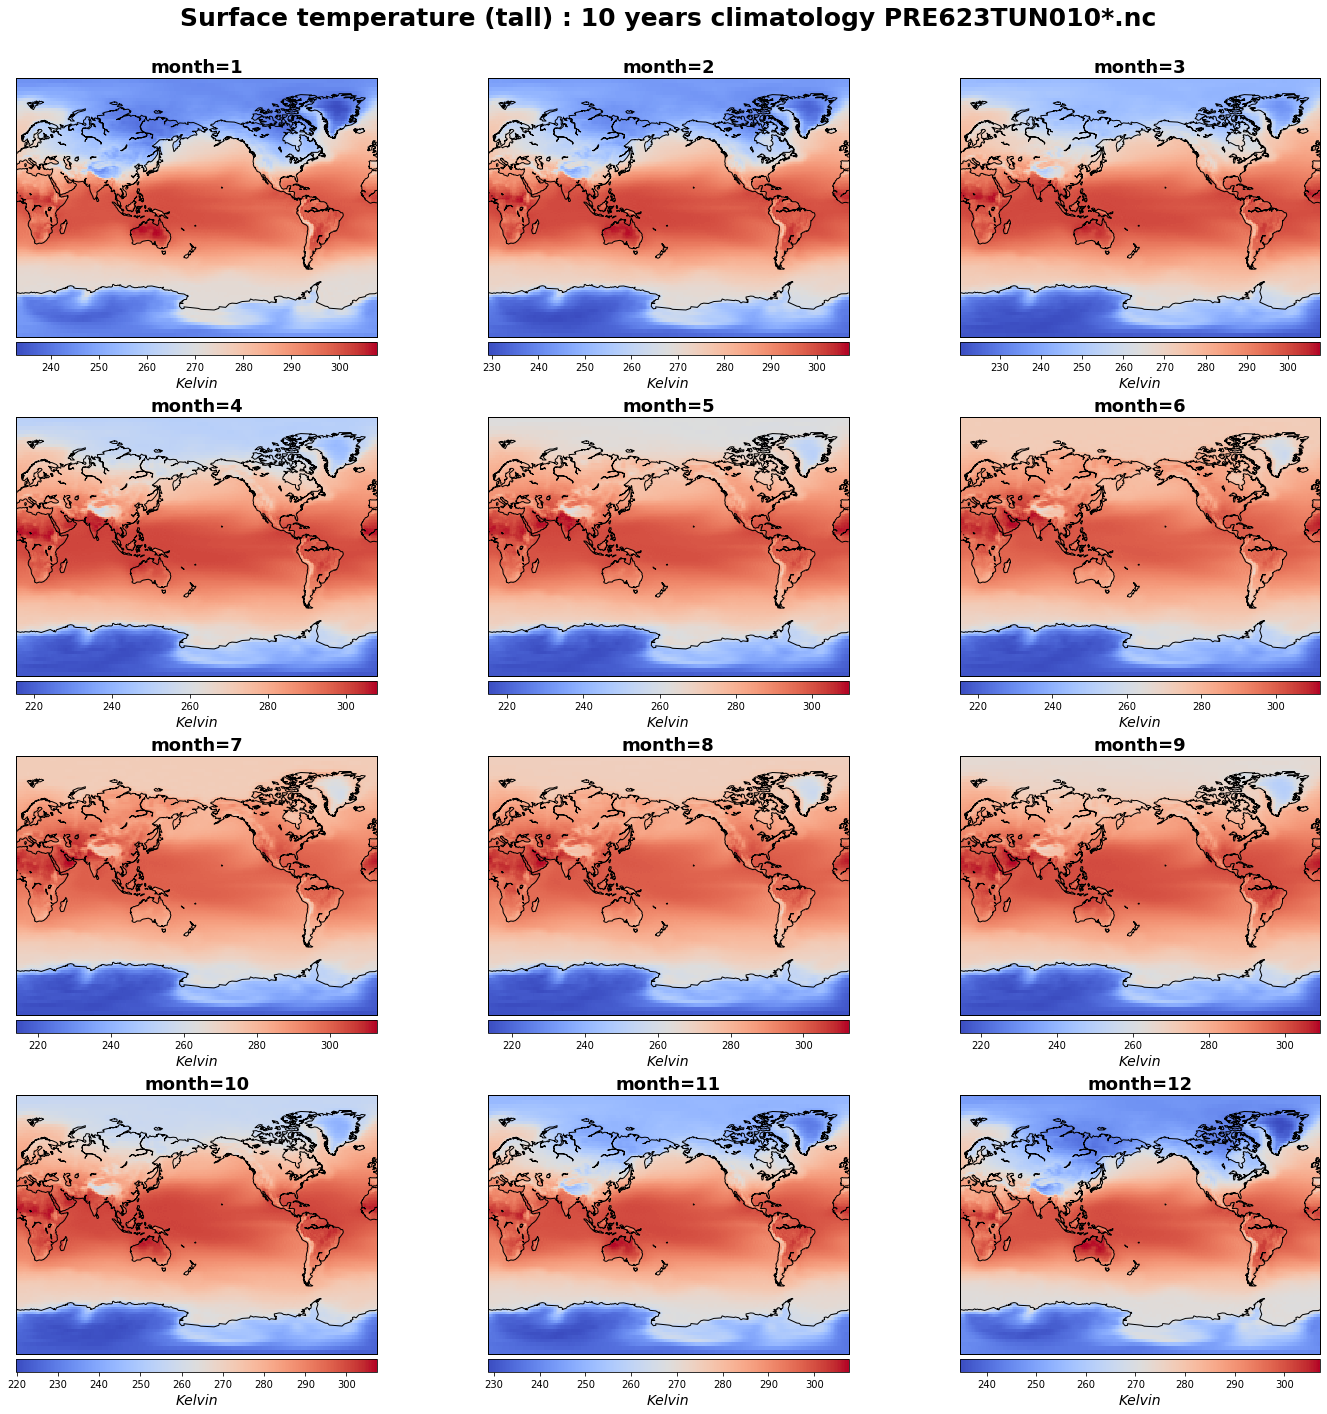

In [59]:
# --------------------------- Temperature : ------------------------------------
#>>>>>>>>>>> SIMULATIONS

fig_simulT = plt.figure()

#print(file.variables)
lat = clim_simul.variables['lat'][:]
lon = clim_simul.variables['lon'][:]

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig_simulT=plt.figure(figsize=(20, 20) )

# boucle pour céer les figures:
i=0
p=1
while i < 12:
    ax = fig_simulT.add_subplot(4,3,p)
    data = clim_simul.variables['tall'][i,:,:]
    k=str(p)
    ax.set_title("month="+k, fontsize=18, fontweight = 'bold')
    m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
        urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
        resolution='c')
    x, y = m(*np.meshgrid(lon,lat))
    m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform')
    #cbar.set_ticks(np.arange(230,10,300))
    cbar.set_label ('Kelvin', size = 14, style = 'italic')
    m.drawcoastlines()
    m.drawmapboundary()
    i = i+1
    p = p + 1

fig_simulT.suptitle('Surface temperature (tall) : 10 years climatology PRE623TUN010*.nc', fontsize=25, fontweight = 'bold')
fig_simulT.tight_layout()
fig_simulT.subplots_adjust(top=0.93)


/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<Figure size 432x288 with 0 Axes>

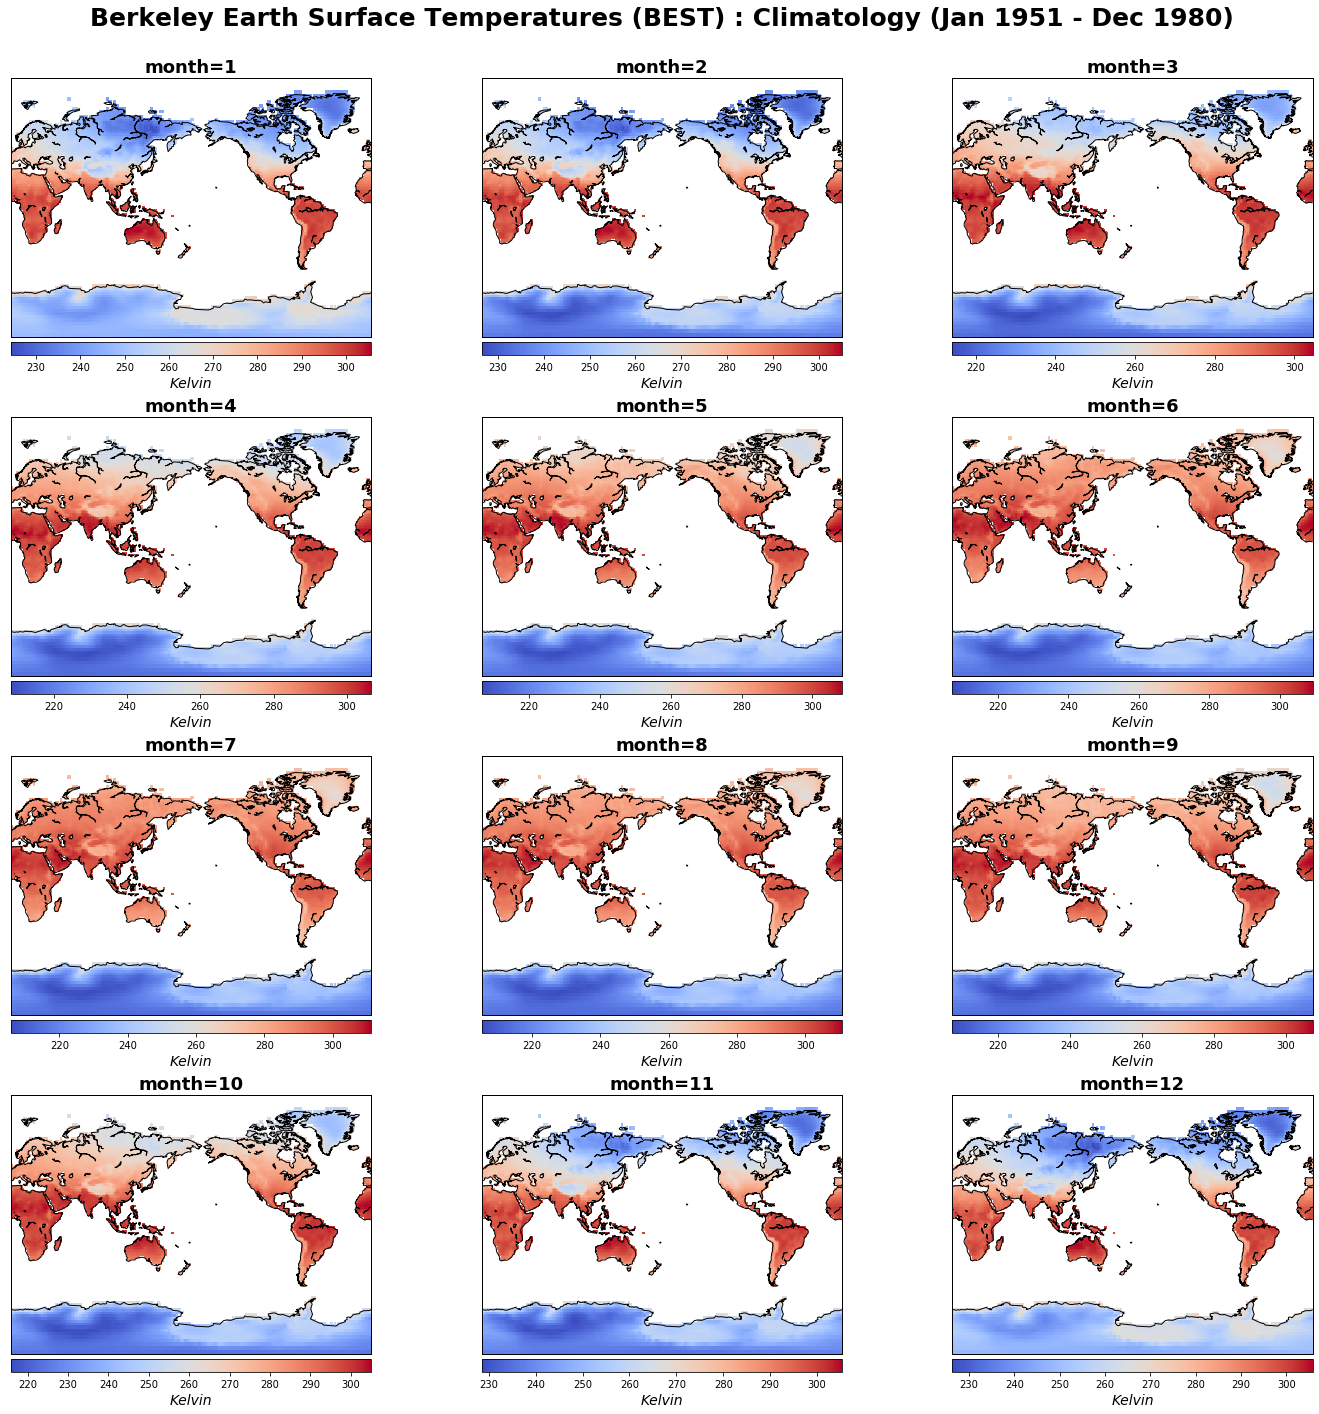

In [36]:
# --------------------------- Temperature : ------------------------------------
#>>>>>>>>>>> OBSERVATIONS

fig_obsT = plt.figure()

#print(file.variables)
lat = clim_obsT.variables['lat'][:]
lon = clim_obsT.variables['lon'][:]

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig_obsT=plt.figure(figsize=(20, 20) )

# boucle pour céer les figures:
i=0
p=1
while i < 12:
    ax = fig_obsT.add_subplot(4,3,p)
    data = clim_obsT.variables['climatology'][i,:,:]
    k=str(p)
    ax.set_title("month="+k, fontsize=18, fontweight = 'bold')
    m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
        urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
        resolution='c')
    x, y = m(*np.meshgrid(lon,lat))
    m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.coolwarm)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform')
    #cbar.set_ticks(np.arange(230,10,300))
    cbar.set_label ('Kelvin', size = 14, style = 'italic')
    m.drawcoastlines()
    m.drawmapboundary()
    i = i+1
    p = p + 1

fig_obsT.suptitle('Berkeley Earth Surface Temperatures (BEST) : Climatology (Jan 1951 - Dec 1980)', fontsize=25, fontweight = 'bold')
fig_obsT.tight_layout()
fig_obsT.subplots_adjust(top=0.93)

# Compute differences

In [41]:
#---------------------------------------- Temperature ------------------------------------------------------
diff_T = clim_simul['tall'] - clim_obsT['climatology'] 
diff_Tframe = diff_T.to_dataframe('diff_temperature')
diff_Tframe = diff_Tframe.reset_index(level=['month_number'])
diff_Tframe = diff_Tframe.drop(labels=['month_number'],axis=1)
diff_Tframe = diff_Tframe[~diff_Tframe.index.duplicated()]
diff_T = diff_Tframe.to_xarray().transpose('month','lat','lon')
diff_T

<xarray.Dataset>
Dimensions:           (lat: 128, lon: 256, month: 12)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat               (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon               (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
Data variables:
    diff_temperature  (month, lat, lon) float32 -2.595459 -2.6469116 ... nan nan

/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<Figure size 432x288 with 0 Axes>

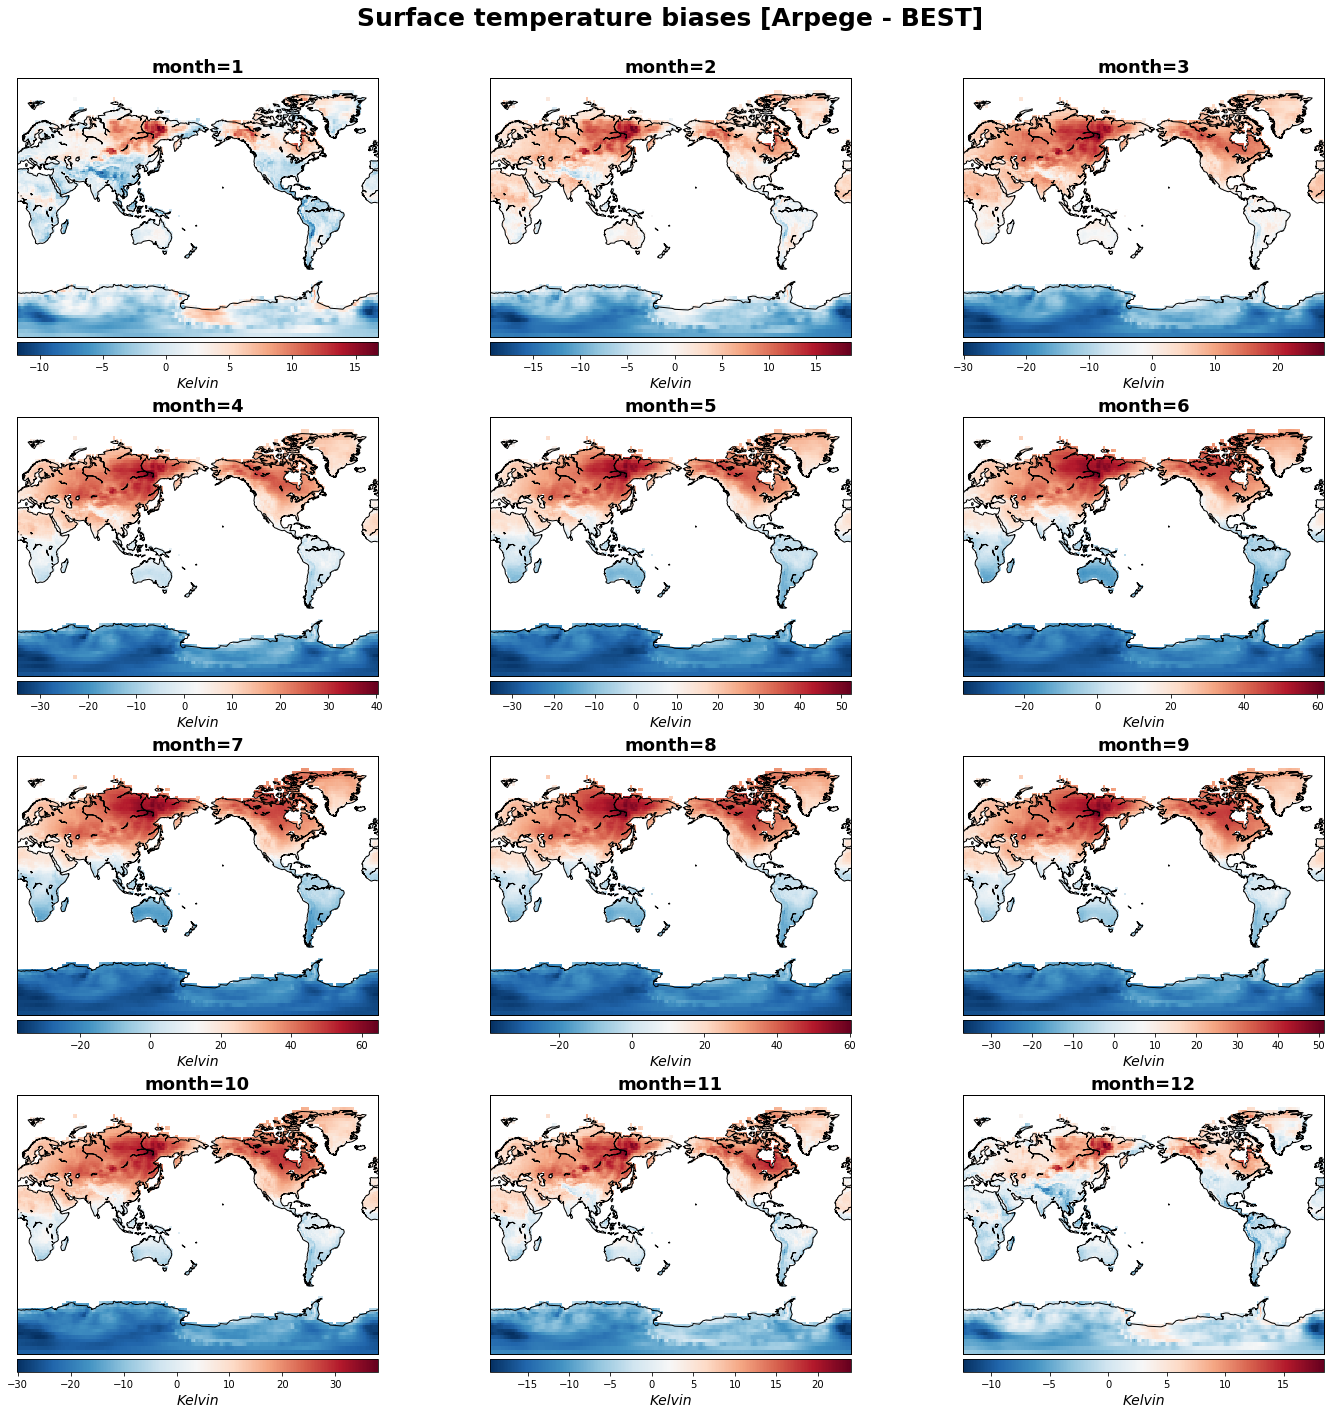

In [55]:
# --------------------------- Temperature : ------------------------------------
#>>>>>>>>>>> DIFFERENCE : SIMULATION - OBSERVATIONS

fig_diffT = plt.figure()

#print(file.variables)
lat = diff_T.variables['lat'][:]
lon = diff_T.variables['lon'][:]

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig_diffT=plt.figure(figsize=(20, 20) )

# boucle pour céer les figures:
i=0
p=1
while i < 12:
    ax = fig_diffT.add_subplot(4,3,p)
    data = diff_T.variables['diff_temperature'][i,:,:]
    k=str(p)
    ax.set_title("month="+k, fontsize=18, fontweight = 'bold')
    m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
        urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
        resolution='c')
    x, y = m(*np.meshgrid(lon,lat))
    m.pcolormesh(x,y,data,shading='flat',cmap='RdBu_r')
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform')
    #cbar.set_ticks(np.arange(230,10,300))
    cbar.set_label ('Kelvin', size = 14, style = 'italic')
    m.drawcoastlines()
    m.drawmapboundary()
    i = i+1
    p = p + 1

fig_diffT.suptitle('Surface temperature biases [Arpege - BEST]', fontsize=25, fontweight = 'bold')
fig_diffT.tight_layout()
fig_diffT.subplots_adjust(top=0.93)